In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

In [1]:
# X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
# X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
# mlp_clfr = MLPClassifier(solver='lbfgs',random_state=0)
# mlp_clfr.fit(X_train,y_train)

### Neural Networks

#### Activation Functions

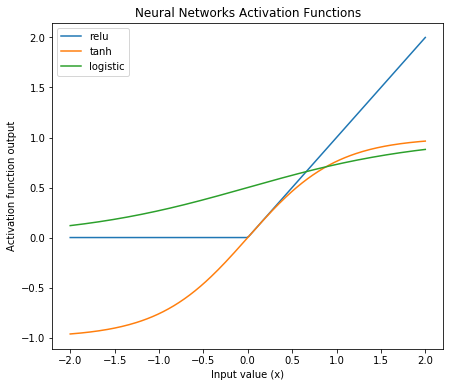

In [19]:
x_range = np.linspace(-2,2,200)
plt.figure(figsize=(7,6))
plt.plot(x_range, np.maximum(x_range,0), label='relu')
plt.plot(x_range, np.tanh(x_range), label='tanh')
plt.plot(x_range, 1/(1 + (np.exp(-x_range))), label='logistic')
plt.title('Neural Networks Activation Functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')
plt.legend()
plt.show()

### Neural Networks: Classification

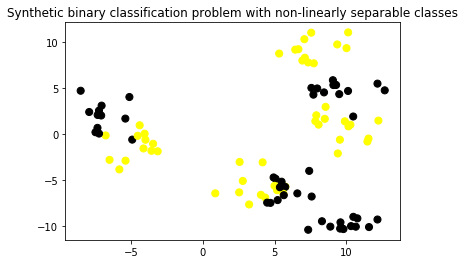

In [50]:
# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Synthetic binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, 
            marker='o', s=50, cmap=cmap_bold)
plt.show()

#### Synthetic dataset1: Single hidden layer

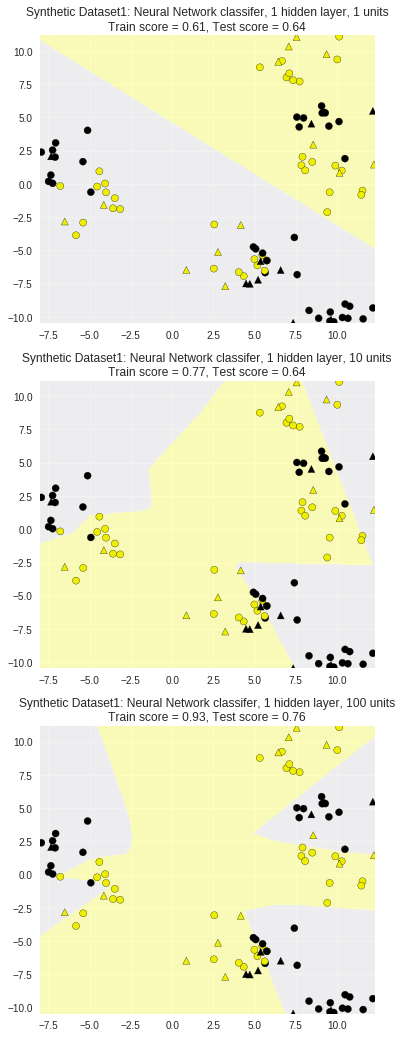

In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
X_train, X_test, y_train, y_test = train_test_split(X_D2,y_D2,random_state=0)
units = [1,10,100]
fig, subaxes = plt.subplots(3, 1, figsize=(6,18))
for axis,unit in zip(subaxes,units):
    mlp = MLPClassifier(hidden_layer_sizes=[unit], solver='lbfgs',
                       random_state=0)
    mlp.fit(X_train,y_train)
    title = "Synthetic Dataset1: Neural Network classifer, 1 hidden layer, {} units".format(unit)
    plot_class_regions_for_classifier_subplot(mlp,X_train,y_train,
                                              X_test,y_test,
                                              title,axis)